# Thống kê máy tính và ứng dụng (Computational Statistics and Applications)

**Khoa Công nghệ Thông tin - ĐH Khoa học Tự nhiên TP. HCM ([fit@hcmus](https://www.fit.hcmus.edu.vn/))**

*Vũ Quốc Hoàng (vqhoang@fit.hcmus.edu.vn)*

# Bài 3 - Phương pháp Monte Carlo và sinh số ngẫu nhiên

**Nội dung**

* [Phương pháp Monte Carlo](#monte_carlo)
  * [Ví dụ 1](#monte_carlo_vi_du_1)
  * [Ví dụ 2](#monte_carlo_vi_du_2)
* [Sinh số ngẫu nhiên](#sinh_so_ngau_nhien)
* [Các bộ sinh số giả ngẫu nhiên](#gia_ngau_nhien)
* [Sinh biến ngẫu nhiên rời rạc](#roi_rac)
* [Phương pháp biến đổi ngược](#bien_doi_nguoc)
* [Phương pháp lấy mẫu loại bỏ](#loai_bo)
  * [Lấy mẫu loại bỏ cơ bản](#loai_bo_co_ban)
  * [Lấy mẫu loại bỏ theo khuôn](#loai_bo_theo_khuon)
  * [Lấy mẫu cho phân phối có điều kiện](#loai_bo_dieu_kien)

In [1]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## <a name="monte_carlo"/>Phương pháp Monte Carlo

### <a name="monte_carlo_vi_du_1"/>Ví dụ 1

Ước lượng số $\pi$ (xem [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)).

In [2]:
def draw_point():
    x, y = random.random(), random.random()
    return x**2 + y**2 <= 1

N = 1000_000
f = sum(draw_point() for _ in range (N))/N
pi = 4*f
print(pi)

3.141696


Tính toán hiệu quả hơn (nhanh hơn) với NumPy.

In [3]:
N = 1000_0000
x, y = np.random.random(N), np.random.random(N)
f = np.mean(x**2 + y**2 <= 1)
pi = 4*f
print(pi)

3.1418464


### <a name="monte_carlo_vi_du_2"/>Ví dụ 2

Ước lượng 
$$\int_0^{2\pi} e^{\cos x}dx.$$

Tích phân này không tính chính xác được. Giá trị xấp xỉ khoảng 7.9549 (có thể tính online tại [Wolfram|Alpha](https://www.wolframalpha.com/calculators/integral-calculator/)).

Mã sau ước lượng bằng phương pháp Monte Carlo.

In [4]:
N = 1000_000
X = np.random.uniform(0, 2*np.pi, size=N)
Y = np.exp(np.cos(X))

print(round(2*np.pi * np.mean(Y), 4))

7.9643


## <a name="sinh_so_ngau_nhien"/>Sinh số ngẫu nhiên

**Yêu cầu.** Từ một đồng xu có xác suất ra ngửa là $p$ $(0 < p < 1)$, ta không biết giá trị của $p$, tìm cách sinh một biến cố có xác suất là 50%.

In [5]:
def tung_dong_xu():
    p = 0.7 # unknown
    return random.choices([0, 1], [1 - p, p])[0]

def tan_xuat(e, N): 
    return sum(e() for _ in range(N))/N

tan_xuat(tung_dong_xu, 10000)

0.6925

**Giải pháp.** Ta có thể sinh một biến cố có xác suất là 50% từ đồng xu bằng thủ tục sau

> *Bước 1.* Tung đồng xu 2 lần, gọi $m_1, m_2$ lần lượt là mặt ra của đồng xu ở lần 1, lần 2.
>
> *Bước 2.* Lặp lại Bước 1 cho đến khi $m_1 \neq m_2$.
>
> *Bước 3.* Trả về biến cố "$m_1$ là ngửa".

In [6]:
def tung_dong_xu_can_bang():
    while True:
        m1 = tung_dong_xu()
        m2 = tung_dong_xu()
        if m1 != m2:
            break
    return m1

tan_xuat(tung_dong_xu_can_bang, 10000)

0.4975

## <a name="gia_ngau_nhien"/>Các bộ sinh số giả ngẫu nhiên

### Thuật toán LCG

In [7]:
# Algorithm LCG
# Input:
#   N (output sequence length)
#   m > 1 (modulus)
#   a ∈ {1, 2, . . . , m − 1} (multiplier)
#   c ∈ {0, 1, . . . , m − 1} (increment)
#   X0 ∈ {0, 1, . . . , m − 1} (seed)
# Output: a sequence X1, X2, X3, . . . of pseudo random numbers
def LCG(N, m, a, c, X0=0):
    X = np.zeros((N,), dtype="int64")
    Xn = X0
    for n in range(N):
        Xn = (a*Xn + c) % m
        X[n] = Xn
    return X

In [8]:
N = 10
x = LCG(N, m=8, a=5, c=1, X0=0)
pd.DataFrame({"$n$": range(1, N+1), "$X_n$": x})

,$n$,$X_n$
0,1,1
1,2,6
2,3,7
3,4,4
4,5,5
5,6,2
6,7,3
7,8,0
8,9,1
9,10,6


In [9]:
x = LCG(N=10000, m=2**31, a=1103515245, c=12345, X0=0)
print(len(np.unique(x)))

10000


In [10]:
x = LCG(N=10000, m=1024, a=493, c=123, X0=0)
print(len(np.unique(x)))
print(x[:10])
print(x[1024 : 1024 + 10])

1024
[123 346 717 324 111 574 481 712 931 354]
[123 346 717 324 111 574 481 712 931 354]


### Chất lượng của các bộ sinh số giả ngẫu nhiên

Cần chọn $m, a, c$ phù hợp để có bộ sinh "tốt".

Xem [Wikipedia - Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator).

In [11]:
N = 1000

x = [None for _ in range(4)]
x[0] = np.random.uniform(size=N)
x[1] = LCG(N, m=1024, a=493, c=123)/1024
x[2] = LCG(N, m=2**16+1, a=75, c=74)/(2**16 + 1)
x[3] = LCG(N, m=2**31, a=1103515245, c=12345)/2**31

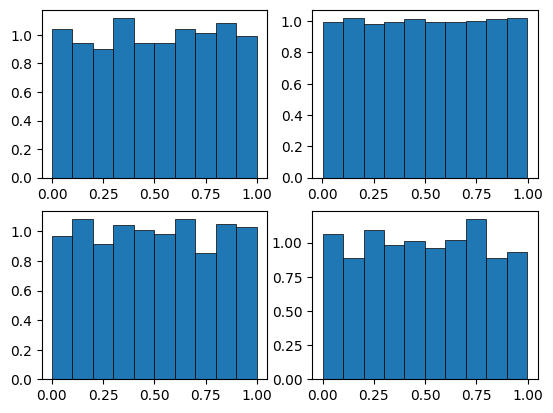

In [12]:
# histogram
_, axes = plt.subplots(2, 2)
for xi, ax in zip(x, axes.flatten()):
    ax.hist(xi, density=True, edgecolor="black", linewidth=0.5)

#plt.savefig("PRNG_hist.pdf", bbox_inches="tight")
plt.show()

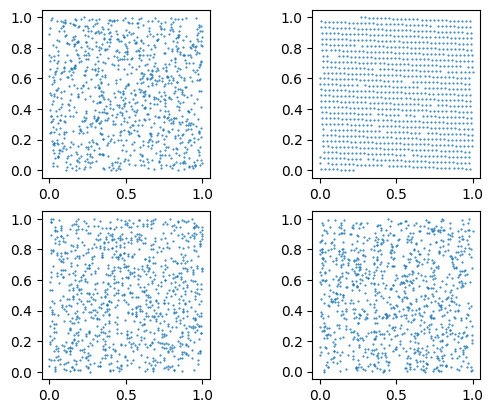

In [13]:
# correlation
_, axes = plt.subplots(2, 2)
for xi, ax in zip(x, axes.flatten()):
    ax.scatter(xi[:N-1], xi[1:], marker=".", s=1)
    ax.set_aspect('equal', 'box')

#plt.savefig("PRNG_cor.pdf", bbox_inches="tight")
plt.show()

Xem thêm: [Python random](https://docs.python.org/3/library/random.html) và [NumPy random](https://numpy.org/doc/stable/reference/random/index.html).

## <a name="roi_rac"/>Sinh biến ngẫu nhiên rời rạc

Ví dụ sinh biến ngẫu nhiên có phân phối hình học với tham số $p$.

In [14]:
p = 0.2
N = 10**5

x = np.ceil(np.log(1 - np.random.random(size=N))/np.log(p))
i = np.arange(1, np.max(x) + 1)

counter = Counter(x)
m = int(max(counter.keys()))
i_list = range(1, m + 1)
pd.DataFrame({
    "$i$": i_list,
    "$P(X=i)$": [round(p**(i - 1)*(1 - p), 5) for i in i_list],
    "Freq": [round(counter[i]/N, 5) for i in i_list]
})

,$i$,$P(X=i)$,Freq
0,1,0.80000,0.79979
1,2,0.16000,0.15990
2,3,0.03200,0.03248
3,4,0.00640,0.00641
4,5,0.00128,0.00113
5,6,0.00026,0.00027
6,7,0.00005,0.00002


## <a name="bien_doi_nguoc"/>Phương pháp biến đổi ngược

Ví dụ sinh biến ngẫu nhiên có phân phối mũ với tham số $\lambda$.

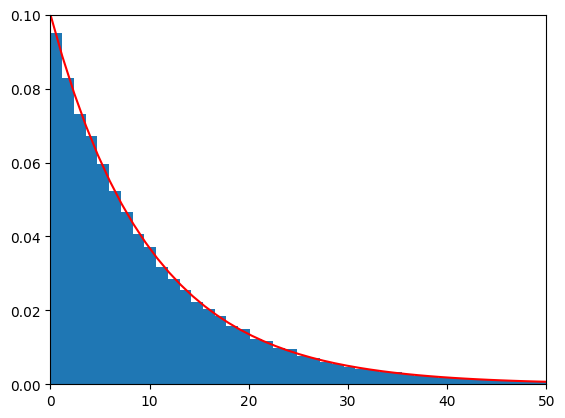

In [15]:
N = 10**5
lamb = 0.1

x = -np.log(1 - np.random.uniform(size=N))/lamb

t = np.linspace(0, np.max(x), num=100)
plt.hist(x, bins=100, density=True)
plt.xlim(0, 50)
plt.ylim(0, 0.1)
plt.plot(t, lamb*np.exp(-lamb*t), "red")

plt.show()

Ví dụ sinh biến ngẫu nhiên nhận giá trị trong khoảng $[0, 1]$ với hàm mật độ $f(x) = 3x^2$.

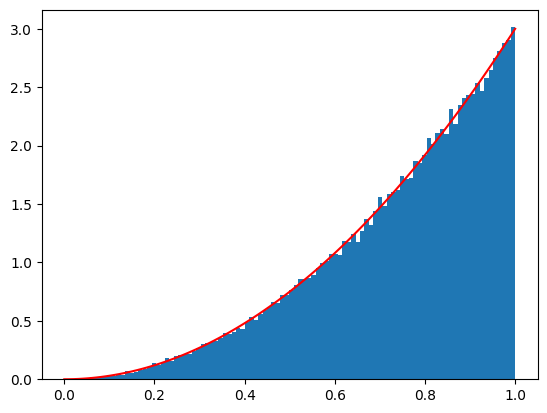

In [16]:
N = 10**5
sigma = 1

x = np.random.uniform(size=N)**(1/3)
t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 3*t**2, "red")

plt.show()

## <a name="loai_bo"/>Phương pháp lấy mẫu loại bỏ

### <a name="loai_bo_co_ban"/>Lấy mẫu loại bỏ cơ bản

In [17]:
# Algorithm BRS
# Input:
#   N: output sequence length
#   g: sampler for the proposal density
#   p: the acceptance probability
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f
#   T: total number of proposals
def BSR(N, g, p):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = g()
        Un = np.random.uniform(size=1)
        if Un <= p(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Ví dụ phân phối nửa đường tròn Wigner.

Acceptance rate (Z): 0.7871
0.7853981633974483


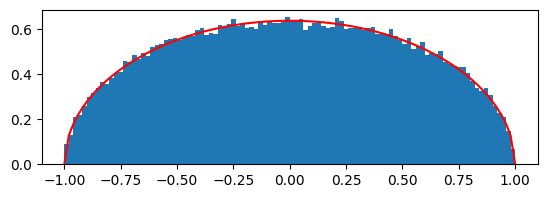

In [18]:
g = lambda: np.random.uniform(-1, 1, size=1)
p = lambda x: np.sqrt(1 - x**2)

N = 10**5

x, T = BSR(N, g, p)
print("Acceptance rate (Z):", round(N/T, 4))
print(np.pi/4)

t = np.linspace(-1, 1, num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.pi*np.sqrt(1 - t**2), "red")
plt.gca().set_aspect('equal')

plt.show()

### <a name="loai_bo_theo_khuon"/>Lấy mẫu loại bỏ theo khuôn

In [19]:
# Algorithm ERS
# Input:
#   N: output sequence length
#   f: the non-normalised target density
#   gs: sampler for the proposal density
#   g: the proposal density
#   c > 0: such that f(x) <= c g(x) for all x
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f tiddle
#   T: total number of proposals
def ESR(N, f, gs, g, c):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = gs()
        Un = np.random.uniform(size=1)
        if c*g(Xn)*Un <= f(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Ví dụ phân phối nửa chuẩn.

Acceptance rate (Z): 0.7611
0.7601734505331403


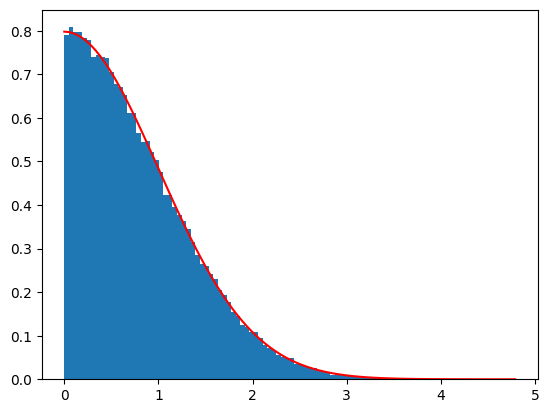

In [20]:
lamb = 1
f = lambda x: 2/np.sqrt(2*np.pi)*np.exp(-x**2/2) if x >= 0 else 0
gs = lambda: np.random.exponential(lamb, size=1)
g = lambda x: lamb*np.exp(-lamb*x)
c = np.sqrt(2/(np.pi*lamb**2))*np.exp(lamb**2/2)

x, T = ESR(N, f, gs, g, c)
print("Acceptance rate (Z):", round(N/T, 4))
print(1/c)

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

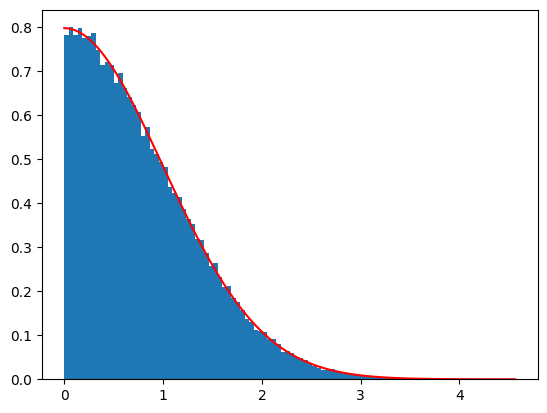

In [21]:
x = np.abs(np.random.normal(size=N))

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

Acceptance rate (Z): 0.4998
0.4998125702861427


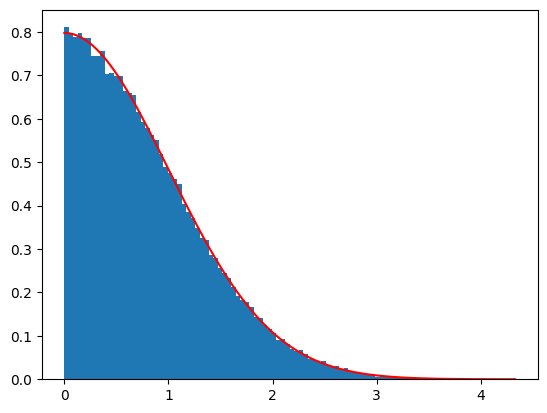

In [22]:
def half_normal(N):
    T = 0
    X = []
    i = 0
    while i < N:
        Xn = np.random.normal(size=1)
        T = T + 1
        if Xn >= 0:
            i = i + 1
            X.append(Xn)
    
    return (np.array(X), T)

x, T = half_normal(N)
print("Acceptance rate (Z):", round(N/T, 4))
print(N/T)

t = np.linspace(0, np.max(x), num=100)

plt.hist(x, bins=100, density=True)
plt.plot(t, 2/np.sqrt(2*np.pi)*np.exp(-t**2/2), "red")

plt.show()

### <a name="loai_bo_dieu_kien"/>Lấy mẫu cho phân phối có điều kiện

Sinh $X$ chuẩn tắc với điều kiện $X \ge a$.

In [23]:
a = np.arange(1, 7)
ENa = np.int_(np.round(1/(1 - stats.norm.cdf(a))))
pd.DataFrame({"$a$": a, "$E(N_a)$": ENa})

,$a$,$E(N_a)$
0,1,6
1,2,44
2,3,741
3,4,31574
4,5,3488556
5,6,1013594635


In [24]:
a = np.arange(1, 7)
ENa = np.round(np.exp(-a**2/2)/(a*np.sqrt(2*np.pi)*(1 - stats.norm.cdf(a))), 4)
ENa_e = []
for ai in a:
    f = lambda x: np.exp(-x**2/2) * (1 if x >= ai else 0)
    gs = lambda: np.random.exponential(1/ai, size=1) + ai
    g = lambda x: ai*np.exp(-ai*(x - ai)) * (1 if x >= ai else 0)
    c = np.exp(-ai**2/2)/ai
    N = 10**4

    _, T = ESR(N, f, gs, g, c)
    ENa_e.append(round(T/N, 4))

pd.DataFrame({"$a$": a, "$E(N_a)$": ENa, "Average": ENa_e})

,$a$,$E(N_a)$,Average
0,1,1.5251,1.5094
1,2,1.1866,1.1824
2,3,1.0944,1.0938
3,4,1.0564,1.0578
4,5,1.0373,1.0370
5,6,1.0264,1.0291
